In [4]:
!pip install gymnasium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 7.5 MB/s eta 0:00:00


In [6]:
import numpy as np
import gym
import matplotlib.pyplot as plt
import random
import time

In [7]:
# Function to choose an action using the epsilon-greedy policy
def choose_action(state):
    if np.random.rand() < epsilon:
        # Choose a random action
        return env.action_space.sample()
    else:
        # Choose the action with the highest Q-value
        return np.argmax(Q[state])

# Function to update the Q-table
def update_q(state, action, reward, next_state):
    best_next_action = np.argmax(Q[next_state])
    td_target = reward + discount_factor_g * Q[next_state, best_next_action]
    td_error = td_target - Q[state, action]
    Q[state, action] += learning_rate_a * td_error

# Function to display the state


def show_state(step, env, obs, reward):

   ansi_state = env.render()

   array_state = list(env.unwrapped.decode(obs))

   print(f"Step {step}: {array_state}, Reward: {reward}")

   print(ansi_state)

# Evaluate the agent
def evaluate_agent(num_test_episodes):
    total_rewards = []
    steps_per_episode = []

    for episode in range(num_test_episodes):
        obs = env.reset()  # Get the initial state
        done = False
        total_reward = 0
        steps = 0

        while not done:
            action = np.argmax(Q[obs])
            next_obs, reward, done, _ = env.step(action)
            total_reward += reward
            obs = next_obs
            steps += 1

        total_rewards.append(total_reward)
        steps_per_episode.append(steps)

    average_reward = np.mean(total_rewards)
    std_reward = np.std(total_rewards)
    average_steps = np.mean(steps_per_episode)
    std_steps = np.std(steps_per_episode)

    return average_reward, std_reward, average_steps, std_steps

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Streaming output truncated to the last 5000 lines.
['+---------+\n|R: | : :\x1bG\x1b|\n| : | : : |\n| : : : :\x1b_\x1b|\n| | : | : |\n|Y| : |B: |\n+---------+\n  (East)\n']
Step 29808: [1, 4, 4, 1], Reward: -11
['+---------+\n|R: | : :\x1bG\x1b|\n| : | : :\x1b_\x1b|\n| : : : : |\n| | : | : |\n|Y| : |B: |\n+---------+\n  (North)\n']
Step 29808: [0, 4, 4, 1], Reward: -12
['+---------+\n|R: | : :\x1b\x1bG\x1b\x1b|\n| : | : : |\n| : : : : |\n| | : | : |\n|Y| : |B: |\n+---------+\n  (North)\n']
Step 29808: [0, 4, 1, 1], Reward: 8
['+---------+\n|R: | : :\x1b\x1b\x1bG\x1b\x1b\x1b|\n| : | : : |\n| : : : : |\n| | : | : |\n|Y| : |B: |\n+---------+\n  (Dropoff)\n']
Step 29809: [2, 3, 1, 0], Reward: -1
['+---------+\n|\x1bR\x1b: | : :\x1bG\x1b|\n| : | : : |\n| : : : : |\n| | : |\x1b \x1b: |\n|Y| : |B: |\n+---------+\n\n', '+---------+\n|\x1bR\x1b: | : :\x1bG\x1b|\n| : | : : |\n| : : :\x1b \x1b: |\n| | : | : |\n|Y| : |B: |\n+---------+\n  (North)\n']
Step 29809: [1, 3, 1, 0], Reward: -2
['+-------

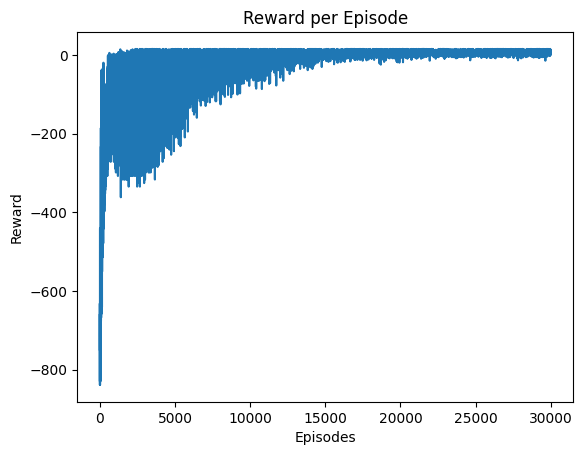

In [8]:
# Initialize the environment
env = gym.make("Taxi-v3", render_mode="ansi")

# Q-Learning parameters
learning_rate_a = 0.01  # Learning rate
discount_factor_g = 0.95  # Discount factor
epsilon = 1.0  # Initial value of epsilon
epsilon_decay_rate = 0.995  # Epsilon decay rate
min_epsilon = 0.01  # Minimum value for epsilon
episodes = 30000  # Number of episodes
num_actions = env.action_space.n  # Number of actions

# Initialize Q-table
Q = np.zeros((env.observation_space.n, num_actions))



# Training the agent
rewards_per_episode = []

for episode in range(episodes):
    obs = env.reset()  # Get the initial state
    total_reward = 0
    done = False

    while not done:
        action = choose_action(obs)
        next_obs, reward, done, _ = env.step(action)
        total_reward += reward
        update_q(obs, action, reward, next_obs)
        obs = next_obs
        show_state(episode, env, obs, total_reward)

    rewards_per_episode.append(total_reward)
    epsilon = max(epsilon * epsilon_decay_rate, min_epsilon)  # Decay epsilon until it reaches the minimum

    if episode % 5000 == 0:
        print(f"Episode {episode}, Epsilon {epsilon}")

    # Show state and reward of the last step



# Initial evaluation
avg_reward, std_reward, avg_steps, std_steps = evaluate_agent(100)

print(f"Initial Evaluation: 100 episodes")
print(f"Average Reward: {avg_reward:.2f} ± {std_reward:.2f}")
print(f"Average Steps per Episode: {avg_steps:.2f} ± {std_steps:.2f}")

# Plotting the performance
plt.plot(rewards_per_episode)
plt.xlabel('Episodes')
plt.ylabel('Reward')
plt.title('Reward per Episode')
plt.savefig('taxi_training.png')
plt.show()

# Render some episodes to observe the agent's behavior
for episode in range(5):
    obs = env.reset()  # Get the initial state
    done = False

    while not done:
        env.render()  # Render the environment
        time.sleep(0.5)  # Optional: Add a short delay to observe the rendering
        action = np.argmax(Q[obs])
        obs, _, done, _ = env.step(action)

env.close()
